## Calculate differences
- Calculate differences using different models on the effect of Trauma vs. Sad on amygdala (later hippocampus and vmPFC)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

# regular GLMs
#import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf

#from utils import calcBF

In [3]:
## Load amygdala database
df = pd.read_csv('amg_TraumavsNeutral.csv')#('TraumavsNeutral_threeSes.csv')
# create a long format for analysis
df_long = pd.melt(df, id_vars=['scr_id','groupIdx'], value_vars=['amg1','amg2','amg3'])
df_long

,scr_id,groupIdx,variable,value
0,KPE008,1,amg1,0.384864
1,KPE1223,1,amg1,0.072214
2,KPE1253,0,amg1,-0.142767
3,KPE1263,0,amg1,-0.254799
4,KPE1293,1,amg1,-0.054429
...,...,...,...,...
76,KPE1561,0,amg3,0.184200
77,KPE1573,1,amg3,0.391631
78,KPE1578,0,amg3,-0.246893
79,KPE1587,1,amg3,NaN


In [4]:
df_long[df_long.scr_id=='KPE008']

,scr_id,groupIdx,variable,value
0,KPE008,1,amg1,0.384864
27,KPE008,1,amg2,-0.004718
54,KPE008,1,amg3,-0.161639


In [5]:
#df_long.to_csv('amg_long.csv', index=False)

In [6]:
df_long.groupby(['groupIdx','variable']).describe()

value                                                    \
                  count      mean       std       min       25%       50%   
groupIdx variable                                                           
0        amg1      13.0  0.091727  0.382140 -0.344641 -0.142767 -0.013621   
         amg2      12.0  0.186816  0.296849 -0.292027  0.030829  0.167474   
         amg3      10.0  0.151494  0.383857 -0.246893 -0.155534  0.091739   
1        amg1      14.0 -0.010331  0.397779 -0.760030 -0.222873  0.008892   
         amg2      14.0 -0.153388  0.337935 -0.702461 -0.325189 -0.173664   
         amg3      12.0 -0.149890  0.357468 -0.721853 -0.334502 -0.190697   

                                       
                        75%       max  
groupIdx variable                      
0        amg1      0.221137  0.990817  
         amg2      0.287380  0.859317  
         amg3      0.288222  0.906373  
1        amg1      0.309385  0.533188  
         amg2      0.015790  0.433613  
         amg3      0.153811  0.391631

In [7]:
## Start with simple GLM models (using statsmodel)
glm = smf.mixedlm('value ~ C(variable) * C(groupIdx)', data=df_long, groups = df_long.scr_id, 
                 missing='drop')
model1 = glm.fit()
print(model1.summary())

                     Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         value   
No. Observations:          75              Method:                     REML    
No. Groups:                27              Scale:                      0.1022  
Min. group size:           2               Log-Likelihood:             -33.7749
Max. group size:           3               Converged:                  Yes     
Mean group size:           2.8                                                 
-------------------------------------------------------------------------------
                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------
Intercept                             0.092    0.100  0.917 0.359 -0.104  0.288
C(variable)[T.amg2]                   0.093    0.128  0.725 0.469 -0.159  0.345
C(variable)[T.amg3]                   0.056    0.136  0.410 0

In [ ]:
# mixed anova
aov = pg.mixed_anova(data=df_long, dv='value', between='groupIdx', within='variable',
                     subject='scr_id', correction=False, effsize="np2")
pg.print_table(aov)

In [ ]:
# simple boxplot graph
a = sns.catplot(y='amg2', x='groupIdx', data= df, kind='violin')
a.set_xticklabels(labels = ["Midazolam", "Ketamine"])
a.set_xlabels("")
a.set_ylabels("Amygdala Activation (standardized)")
a.savefig('amg__time2.png', dpi=300, bbox_inches='tight')

In [ ]:
pg.ttest(df.amg2[df.groupIdx==1], df.amg1[df.groupIdx==1], paired=True, correction=False)

In [ ]:
pg.ttest(df.amg2[df.groupIdx==1], df.amg3[df.groupIdx==1], paired=True, correction=False)

In [ ]:
pg.ttest(df.amg1[df.groupIdx==1], df.amg1[df.groupIdx==0], paired=False, correction=False)

In [ ]:
pg.ttest(df.amg3[df.groupIdx==1], df.amg3[df.groupIdx==0], correction=False)

### As requested from Reviewer 1 - adding withing group time analysis

In [ ]:
# using simple t test
#Ketamine
pg.ttest(df.amg2[df.groupIdx==1], df.amg1[df.groupIdx==1], paired=True, correction=False)
pg.ttest(df.amg3[df.groupIdx==1], df.amg1[df.groupIdx==1], paired=True, correction=False)

In [ ]:
# Midazolam
#pg.ttest(df.amg2[df.groupIdx==0], df.amg1[df.groupIdx==0], paired=True, correction=False)
pg.ttest(df.amg3[df.groupIdx==0], df.amg1[df.groupIdx==0], paired=True, correction=False)

In [ ]:
sns.set(font_scale = 1.15)
sns.set_style("white")
g = sns.catplot(y='value',x='variable', hue='groupIdx', data=df_long, kind='point', ci=68,
               hue_order=[1,0])
g.set_xlabels("")
g.set_xticklabels(
    labels=["Before Treatment", "End of Treatment", "30-days"], rotation=30)

g.set_ylabels("Amygdala (Trauma > Neutral)")
g._legend.set_title("Group")
new_labels = ['Ketamine', 'Midazolam']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g.savefig('amg_pointGraph.png', dpi=300, bbox_inches='tight')

In [ ]:
# Bayes
# take indexes for building the model
df_longKet['scr_id'] = df_longKet.scr_id.astype('category')
sub_idx = df_longKet.scr_id.cat.codes.values # get county category index values (613 x 1) vec with nums [0-7]
print(sub_idx)
n_subs = len(np.unique(df_longKet.scr_id))
print(n_subs)
# set time as index also
#df_long.groupIdx = pd.Categorical(df_long.groupIdx)
df_longKet.variable = pd.Categorical(df_longKet.variable, 
                    categories=['amg1','amg2','amg3'])
timeIDX = df_longKet.variable.cat.codes.values
print(timeIDX)
df_longKet['time'] = timeIDX

In [ ]:
with pm.Model() as hierarchical:   
    a = pm.Normal('a', mu=0, sd=0.1, shape=n_subs)
    b = pm.Normal('b', mu=0, sd=0.1, shape=3)
    
    # Model error
    eps = pm.HalfCauchy('eps', 1)

    y_hat = a[sub_idx] + b[timeIDX]

    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y_hat,
                           sigma=eps, observed=df_longKet.value)
    
    trace = pm.sample(draws=1000, tune=1000, target_accept=0.95, return_inferencedata=True, cores=4)

In [ ]:
az.summary(trace, hdi_prob=.95)

In [ ]:
diffTime = trace.posterior['b'].data[:,:,1] - trace.posterior['b'].data[:,:,0]
sns.distplot(diffTime)
plt.show()
sns.distplot(trace.posterior['b'].data[:,:,2], color='red')
sns.distplot(trace.posterior['b'].data[:,:,0])
sns.distplot(trace.posterior['b'].data[:,:,1], color= 'orange')
print(sum(diffTime.ravel()>0)/len(diffTime.ravel()))

## Build a Bayesian model
- Here we would model each subject under each group

In [ ]:
# first lets look at the data
sns.pairplot(df[['amg1','amg2','amg3','groupIdx']], hue='groupIdx', kind='scatter')

In [ ]:
df_long.groupby(['groupIdx', 'variable']).describe()

In [ ]:
g = sns.catplot(y='value',x='variable', hue='groupIdx', data=df_long, kind='point', ci=68,
               hue_order=[1,0])
g.set_xlabels("Time")
g.set_xticklabels(
    labels=["Before Treatment", "After Treatment", "30-days"], rotation=30)
g.set_xlabels('')
g.set_ylabels("Amygdala (Trauma vs. Neutral)")
g._legend.set_title("Group")
new_labels = ['Ketamine', 'Midazolam']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g.savefig('amg_pointGraph.png', dpi=300, bbox_inches = 'tight')

# Interaction model 
- Include baseline as covariate

In [8]:
df_long2 = pd.melt(df, id_vars=['scr_id','groupIdx', 'amg1'], value_vars=['amg2','amg3'])
#df_long2.to_csv('df_long2.csv', index=False)

In [9]:
glm2 = smf.mixedlm('value ~ C(variable) * C(groupIdx) + amg1', data=df_long2, groups = df_long2.scr_id, 
                 missing='drop')
model2 = glm2.fit()
print(model2.summary())

                     Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         value   
No. Observations:          48              Method:                     REML    
No. Groups:                27              Scale:                      0.0941  
Min. group size:           1               Log-Likelihood:             -19.9992
Max. group size:           2               Converged:                  Yes     
Mean group size:           1.8                                                 
-------------------------------------------------------------------------------
                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------
Intercept                             0.166    0.099  1.690 0.091 -0.027  0.360
C(variable)[T.amg3]                  -0.037    0.134 -0.278 0.781 -0.299  0.225
C(groupIdx)[T.1]                     -0.318    0.134 -2.374 0

In [10]:
# take indexes for building the model
df_long2['scr_id'] = df_long2.scr_id.astype('category')
sub_idx = df_long2.scr_id.cat.codes.values # get county category index values (613 x 1) vec with nums [0-7]
print(sub_idx)
n_subs = len(np.unique(df_long2.scr_id))
print(n_subs)
# set time as index also
#df_long.groupIdx = pd.Categorical(df_long.groupIdx)
df_long2.variable = pd.Categorical(df_long2.variable, 
                    categories=['amg2','amg3'])
timeIDX = df_long2.variable.cat.codes.values
print(timeIDX)
df_long2['time'] = timeIDX


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26]
27
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [11]:
## Run similar model but without hyperpriors
# now we build a model - modeling the score of each group on each time point
with pm.Model() as hierarchical:
      
    a = pm.Normal('a', mu=0, sigma=0.1, shape=n_subs)
    cov = pm.Normal('cov', mu=0.05, sigma=0.1)
    b = pm.Normal('b', mu=0, sigma=0.1, shape=2)
    
    
   # bMed = pm.Normal('bMed', mu=0, sd=0.1, shape=2) #
   # sigma = pm.HalfCauchy('sigma', 1)
    interact = pm.Normal('interaction', mu=0, sigma=1, shape=(2,2))
  
    # Model error
    eps = pm.HalfCauchy('eps', 1)

    y_hat = a[sub_idx] + b[timeIDX] + interact[timeIDX,df_long2.groupIdx] + cov*df_long2.amg1

    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y_hat,
                           sigma=eps, observed=df_long2.value)
    
    
    # calculate differences and effect size
    diff_of_means1 = pm.Deterministic('differenceGroups end of treatment', interact[0,1] - interact[0,0])
    diff_of_means2 = pm.Deterministic('differenceGroups 30 days', interact[1,1] - interact[1,0])
   
    # effect size
    effect_size1 = pm.Deterministic('effect size2_1', 
                        diff_of_means1 / eps)
    
    effect_size2 = pm.Deterministic('effect size3_1', 
                        diff_of_means2 / eps)
    
#     effect_size3 = pm.Deterministic('effect size4_1', 
#                         abs(diff_of_means3) / eps)
    
    ppChecks = pm.sample_prior_predictive(samples = 8000)
    trace = pm.sample(draws=2000, tune=1000, target_accept=0.9, return_inferencedata=True, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, cov, b, interaction, eps, likelihood_missing]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 27 seconds.


In [ ]:
sns.histplot(np.mean(trace.sample_stats.lp.values, axis=0))

In [ ]:
az.summary(trace, hdi_prob=.95)

In [ ]:
priorC = ppChecks['interaction'][:,1,0] - ppChecks['interaction'][:,1,1] 
sns.histplot(priorC)

In [ ]:
tr = trace.posterior.stack(draws=("chain", "draw"))
sns.histplot(tr.interaction.values[0,0,:,], label='midazolam', color='red')
sns.histplot(tr.interaction.values[0,1,:], label = 'ketamine', color='blue')
plt.legend()

In [ ]:
az.plot_posterior(tr.interaction.values[0,0,:] - tr.interaction.values[0,1,:], kind='hist', ref_val=0,
                 rope=[-0.1,.1], hdi_prob=.9)

In [ ]:
az.plot_posterior(trace, var_names=['effect size2_1','effect size3_1'], rope=[-.2,.2], kind='hist',
                 ref_val=0)

## Calculate Bayes Factor for each time point

({'BF10': array([7.44527675]), 'BF01': array([0.13431334])},
 <Axes: title={'center': 'The BF_10 is 7.45\nThe BF_01 is 0.13'}, xlabel='effect size2_1', ylabel='Density'>)

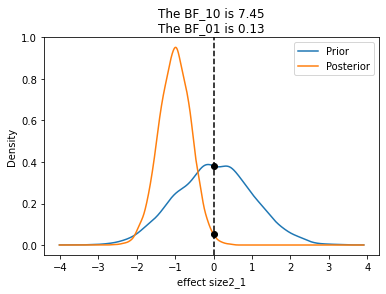

In [14]:
az.plot_bf(trace, var_name = 'effect size2_1', prior = np.random.normal(0, 1, 5000))

({'BF10': array([2.58480755]), 'BF01': array([0.386876])},
 <Axes: title={'center': 'The BF_10 is 2.58\nThe BF_01 is 0.39'}, xlabel='effect size3_1', ylabel='Density'>)

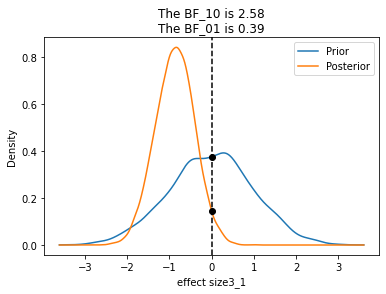

In [17]:
az.plot_bf(trace, var_name = 'effect size3_1', prior = np.random.normal(0, 1, 5000))

## Only interaction (no simple effects)

In [ ]:
with pm.Model() as interaction:
      
    a = pm.Normal('a', mu=0, sd=.1, shape=n_subs)
    cov = pm.Normal('cov', mu=0, sd=.1)
    b = pm.Normal('b', mu=0, sd=.1)
    
    
    bMed = pm.Normal('bMed', mu=0, sd=.1) #
   # sigma = pm.HalfCauchy('sigma', 1)
    interact = pm.Normal('interaction', mu=0, sd=.1)
  
    # Model error
    eps = pm.HalfCauchy('eps', 1)

    y_hat = a[sub_idx] + b*timeIDX + bMed*df_long2.groupIdx  + interact*timeIDX*df_long2.groupIdx + cov*df_long2.amg1

    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y_hat,
                           sigma=eps, observed=df_long2.value)
    
    
   
    
    #ppChecks = pm.sample_prior_predictive(samples = 8000)
    trace2 = pm.sample(draws=10000, tune=1000, target_accept=0.9, return_inferencedata=True, cores=4)

In [ ]:
az.summary(trace2, hdi_prob=.95)

## Next we calculate the difference between the groups in each time
- Althgough the interaction wasn't significant, we still look at this one - as there's a group difference

In [ ]:
with pm.Model() as model_glm:
    pm.GLM.from_formula('amg1 ~ groupIdx', df)
    traceSes1 = pm.sample(return_inferencedata=True)
az.summary(traceSes1, hdi_prob=.9)

In [ ]:
with pm.Model() as model_glm:
    pm.GLM.from_formula('amg2 ~ groupIdx', df)
    traceSes2 = pm.sample(return_inferencedata=True)

In [ ]:
az.summary(traceSes2, hdi_prob=.95)

In [ ]:
az.plot_posterior(traceSes2, var_names='groupIdx', rope=[-.1,.1], kind='hist', hdi_prob=.9)

In [ ]:
with pm.Model() as model_glm:
    pm.GLM.from_formula('amg3 ~ groupIdx', df)
    traceSes3 = pm.sample(return_inferencedata=True)

In [ ]:
az.summary(traceSes3, hdi_prob=.95)

## Using a different method for assessing

In [ ]:
## create a function that will simply run the model for each session
def runModel(variable):
    with pm.Model() as hierarchical:
      
        a = pm.Normal('a', mu=0, sd=1) 
        bMed = pm.Normal('bMed', mu=0, sd=1, shape=2) #

        # Model error
        eps = pm.HalfCauchy('eps', 5)

        y_hat = a + bMed[df.groupIdx]

        # Data likelihood
        likelihood = pm.Normal('likelihood', mu=y_hat,
                               sigma=eps, observed=df[str(variable)])

        trace = pm.sample(draws=4000, tune=2000,target_accept=0.9, return_inferencedata=False)
        diff = trace['bMed'][:,1] - trace['bMed'][:,0]
    return trace, diff

In [ ]:
ses1trace, ses1Diff = runModel('amg1')

In [ ]:
pm.summary(ses1trace)
sns.distplot(ses1Diff)
print(f'Group difference is {sum(ses1Diff>0)/len(ses1Diff)}')

In [ ]:
ses2trace, ses2Diff = runModel('amg2')
pm.summary(ses2trace)
sns.distplot(ses2Diff)
print(f'Group difference is {sum(ses2Diff>0)/len(ses2Diff)}')

In [ ]:
ses3trace, ses3Diff = runModel('amg3')
pm.summary(ses3trace)
sns.distplot(ses3Diff)
print(f'Group difference is {sum(ses3Diff>0)/len(ses3Diff)}')

## Plotting

In [ ]:
# set variables
def plotDiff(depVar,indepVar, trace):
    sns.set_style("ticks") # set style
    y = str(depVar)
    dfPlot = df
    ci = np.quantile(trace.posterior[str(indepVar)], [.05,.95])
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(3, 5),gridspec_kw={'width_ratios': [1, .2],
                                                            'wspace':.1})
    g1 = sns.stripplot(y= y, x='group', data=dfPlot, size = 8, ax=ax1)
    sns.boxplot(y= y, x='group', data=dfPlot,  ax=ax1,
                boxprops=dict(alpha=.3))
    g2 = sns.distplot(trace.posterior[str(indepVar)], ax = ax2, vertical=True)
    ax2.vlines(x=0.001,ymin=ci[0], ymax=ci[1], color='black', 
               linewidth = 3, linestyle = "-")

    #g3.set_ylim(-.7, .7)
    #ax1.set_ylim(-.7,.7)
    ax2.set_ylim(-0.8, 1)#(g1.get_ylim()) # use first graph's limits to get the relevant for this one
    ax2.yaxis.tick_right()
    ax2.set_xticks([])
    ax2.set_ylabel("Difference between groups", fontsize=14) 
    ax2.yaxis.set_label_position("right")
    ax1.set_ylabel("Amg reactivity to traumatic script", fontsize=12)
   # ax1.set_xlabel("Group", fontsize=14)
    fig.savefig( str(depVar) + 'Reactivity.png', dpi=300, bbox_inches='tight')
    return fig

In [ ]:
def plotSubfigs(subfigs,subNum, depVar,indepVar, trace, title):
    # gets subfig and the index number of it to plot the same as above
    sns.set_style("ticks") # set style
    y = str(depVar)
    dfPlot = df
    ci = np.quantile(trace.posterior[str(indepVar)], [.025,.975])
    axsLeft = subfigs[subNum].subplots(1,2, gridspec_kw={'width_ratios': [1, .2],'wspace':.01})
    ax1 = axsLeft[0]
    ax2 = axsLeft[1]
    g1 = sns.stripplot(y= y, x='group', data=dfPlot, size = 8, ax=ax1)
    sns.boxplot(y= y, x='group', data=dfPlot,  ax=ax1,
                 boxprops=dict(alpha=.3))
    g2 = sns.distplot(trace.posterior[str(indepVar)], ax = ax2, vertical=True)
    ax2.vlines(x=0.001,ymin=ci[0], ymax=ci[1], color='black', 
                linewidth = 3, linestyle = "-")

    ax2.set_ylim(-0.8, 1)#(g1.get_ylim()) # use first graph's limits to get the relevant for this one
    ax1.set_ylim(-0.8, 1)
    ax2.yaxis.tick_right()
    ax2.set_xticks([])
    ax2.set_ylabel("Difference between groups", fontsize=14) 
    ax2.yaxis.set_label_position("right")
    ax1.set_ylabel("Amg reactivity to traumatic script", fontsize=12)
    ax1.set_xlabel('')#("Group", fontsize=14)
    ax1.set_title(title, fontsize=15)
    #ax1.title.set_style(font="large")

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(15, 6))
subfigs = fig.subfigures(1, 3, wspace=0.1)
plotSubfigs(subfigs, 0, 'amg1','groupIdx',traceSes1, "Before Treatment")
#subfigs[0].suptitle('Before Treatment', fontsize='large')
plotSubfigs(subfigs, 1, 'amg2','groupIdx',traceSes2, 'After Treatment')
#subfigs[1].suptitle('After Treatment', fontsize='large')
plotSubfigs(subfigs, 2,'amg3','groupIdx',traceSes3, '30-Days')
#subfigs[2].suptitle('Follow-Up', fontsize='large')
fig.savefig("Amg_reactivity.png",  dpi=300, bbox_inches='tight')

In [ ]:
pg.ttest(df.amg2[df.groupIdx==1], df.amg2[df.groupIdx==0])

In [ ]:
pg.ttest(df.amg3[df.groupIdx==1], df.amg3[df.groupIdx==0])

# Sample size sensitivity

In [ ]:
dfSample = df.groupby(['groupIdx']).sample(20, replace=True).reset_index()
dfSample


In [ ]:
# run a for loop to see effect of sample size in each group
ns = [5,30, 50, 150]
gaps = []
means= []
for n in ns:
    print(f'Now running {n} subjects')
    # random sample from dataframe
    dfSample = df.groupby(['groupIdx']).sample(n, replace=True).reset_index()
    with pm.Model() as model_glm:
        pm.GLM.from_formula('amg2 ~ groupIdx', df)
        trace = pm.sample(return_inferencedata=True)
        
    fivePer= az.summary(trace, hdi_prob=.9, var_names=['groupIdx'])['hdi_5%']
    ninetyPer = az.summary(trace, hdi_prob=.9, var_names=['groupIdx'])['hdi_95%']
    gap = ninetyPer - fivePer
    means.append(abs(az.summary(trace, hdi_prob=.9, var_names=['groupIdx'])['mean']))
    gaps.append(gap)

In [ ]:
# Plot results

plt.plot(ns,np.array(gaps), label = '5-95')
plt.plot(ns, means, label = 'diff')
plt.legend()

In [ ]:
# define ROPE around the zero 
gaps